In [1]:
import numpy as np

# network size N
N = 2000

# number of edges
M = N*3

## initialize time
T = 0
## choose Tmax
Tmax = 100


In [70]:
class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N = 2000):

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    
    ints = list(range(N-1, -1, -1))
    I = [y(i) for i in ints]

    counts = Counter()
    for element in I:
        counts.increment(element, 1)

    distinct_rows = N

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if I[i] != 0:
                
                counts.increment(I[i], -1)

                I[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (I[i] != 0 or I[j] != 0) and I[i] != I[j]:
                    
                new = I[i] | I[j]
                counts.increment(I[i], -1)
                counts.increment(I[j], -1)
                counts.increment(new, 2)
                I[i] = I[j] = new
                
        distinct_rows = len(counts)
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if distinct_rows <= 2:
            times = times[:t]
            break

    return times[-1]


In [71]:
b = np.linspace(0.0002, 0.5, 20)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

t = 0
p_mixing_times = []

for i in range(len(b)):
    t = find_tranformation_matrix(b[i], E)
    if np.round(t) == Tmax:
        p_mixing_times.append(Tmax)
    else:
        for j in range(19):
            t += find_tranformation_matrix(b[i], E)
        print(t/20)
        p_mixing_times.append(t/20)

print(p_mixing_times)


7.416914630897834
8.610459536229138
9.730027191924963
11.266409877596077
14.69056413066588
18.921830258133227
33.662913602691575
93.64256965297224
61.83348648839527
44.046676993623095
37.22005961561759
29.666503905043207
25.461093544341946
23.28995881102683
20.136415342790226
18.93503453133769
17.822358640391393
15.654674322228697
14.613348270010352
13.556899038685211
[7.416914630897834, 8.610459536229138, 9.730027191924963, 11.266409877596077, 14.69056413066588, 18.921830258133227, 33.662913602691575, 93.64256965297224, 61.83348648839527, 44.046676993623095, 37.22005961561759, 29.666503905043207, 25.461093544341946, 23.28995881102683, 20.136415342790226, 18.93503453133769, 17.822358640391393, 15.654674322228697, 14.613348270010352, 13.556899038685211]


In [73]:
b2 = np.linspace(0.5, 2, 10)

t = 0
p_mixing_times2 = []

for i in range(len(b2)):
    t = find_tranformation_matrix(b2[i], E)
    if np.round(t) == Tmax:
        p_mixing_times2.append(Tmax)
    else:
        for j in range(19):
            t += find_tranformation_matrix(b2[i], E)
        print(t/20)
        p_mixing_times2.append(t/20)

print(p_mixing_times2)


14.153096876135658
10.333301766572612
8.133391345638865
7.048081533021984
6.115683096342449
5.337179206047408
4.86832207331034
4.504516615219012
4.3113112359653485
3.760903447267286
[14.153096876135658, 10.333301766572612, 8.133391345638865, 7.048081533021984, 6.115683096342449, 5.337179206047408, 4.86832207331034, 4.504516615219012, 4.3113112359653485, 3.760903447267286]


In [2]:
b = np.linspace(0.0002, 0.5, 20)
b2 = np.linspace(0.5, 2, 10)
b_array = np.concatenate((b, b2))
print(b_array)


[2.00000000e-04 2.65052632e-02 5.28105263e-02 7.91157895e-02
 1.05421053e-01 1.31726316e-01 1.58031579e-01 1.84336842e-01
 2.10642105e-01 2.36947368e-01 2.63252632e-01 2.89557895e-01
 3.15863158e-01 3.42168421e-01 3.68473684e-01 3.94778947e-01
 4.21084211e-01 4.47389474e-01 4.73694737e-01 5.00000000e-01
 5.00000000e-01 6.66666667e-01 8.33333333e-01 1.00000000e+00
 1.16666667e+00 1.33333333e+00 1.50000000e+00 1.66666667e+00
 1.83333333e+00 2.00000000e+00]


In [3]:
p_mixing = [7.416914630897834, 8.610459536229138, 9.730027191924963, 11.266409877596077, 14.69056413066588, 18.921830258133227, 33.662913602691575, 93.64256965297224, 61.83348648839527, 44.046676993623095, 37.22005961561759, 29.666503905043207, 25.461093544341946, 23.28995881102683, 20.136415342790226, 18.93503453133769, 17.822358640391393, 15.654674322228697, 14.613348270010352, 13.556899038685211, 14.153096876135658, 10.333301766572612, 8.133391345638865, 7.048081533021984, 6.115683096342449, 5.337179206047408, 4.86832207331034, 4.504516615219012, 4.3113112359653485, 3.760903447267286]
print(p_mixing)


[7.416914630897834, 8.610459536229138, 9.730027191924963, 11.266409877596077, 14.69056413066588, 18.921830258133227, 33.662913602691575, 93.64256965297224, 61.83348648839527, 44.046676993623095, 37.22005961561759, 29.666503905043207, 25.461093544341946, 23.28995881102683, 20.136415342790226, 18.93503453133769, 17.822358640391393, 15.654674322228697, 14.613348270010352, 13.556899038685211, 14.153096876135658, 10.333301766572612, 8.133391345638865, 7.048081533021984, 6.115683096342449, 5.337179206047408, 4.86832207331034, 4.504516615219012, 4.3113112359653485, 3.760903447267286]


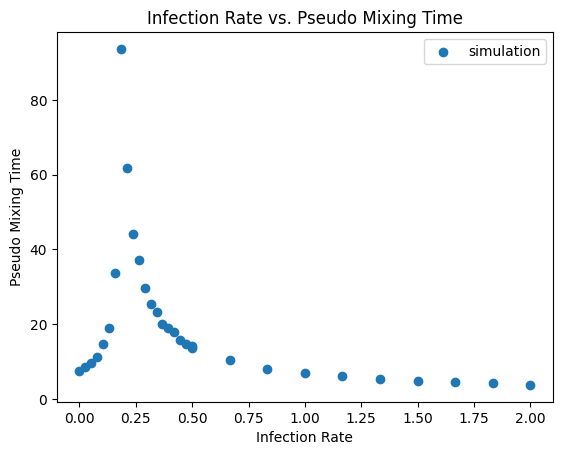

In [83]:
import matplotlib.pyplot as plt

plt.scatter(b_array, p_mixing, label = 'pseudo mixing time simulation')
plt.legend()
plt.title('Infection Rate vs. Pseudo Mixing Time')
plt.ylabel('Pseudo Mixing Time')
plt.xlabel('Infection Rate')
plt.show()


In [79]:
b = np.linspace(0.0002, 0.5, 20)
import networkx as nx
N = 2000
## choose network from network X and change M0 and G
M0 = 30

G = nx.barabasi_albert_graph(N, M0)

## return edge matrix (required for the simulation)
E_barabasi = list(G.edges)

M = np.shape(E_barabasi)[0]

t = 0
p_mixing_times = []

for i in range(len(b)):
    t = find_tranformation_matrix(b[i], E_barabasi)
    if np.round(t) == Tmax:
        p_mixing_times.append(Tmax)
    else:
        for j in range(19):
            t += find_tranformation_matrix(b[i], E_barabasi)
        print(t/20)
        p_mixing_times.append(t/20)

print(p_mixing_times)


7.427005651274051
18.3518224566674
9.694354850200892
6.6277637785511985
5.060649040219955
4.016807944891399
3.311813924215651
2.921971153558513
2.5741455043231136
2.333462028409905
2.0714844399644172
1.9084131665085717
1.7127654693767789
1.5534657227792734
1.5265933104561331
1.361549864044801
1.3117069594269741
1.2036975731762627
1.1369374000552106
1.0921513033125148
[7.427005651274051, 18.3518224566674, 9.694354850200892, 6.6277637785511985, 5.060649040219955, 4.016807944891399, 3.311813924215651, 2.921971153558513, 2.5741455043231136, 2.333462028409905, 2.0714844399644172, 1.9084131665085717, 1.7127654693767789, 1.5534657227792734, 1.5265933104561331, 1.361549864044801, 1.3117069594269741, 1.2036975731762627, 1.1369374000552106, 1.0921513033125148]


In [80]:
p_mixing_times_bar = [7.427005651274051, 18.3518224566674, 9.694354850200892, 6.6277637785511985, 5.060649040219955, 4.016807944891399, 3.311813924215651, 2.921971153558513, 2.5741455043231136, 2.333462028409905, 2.0714844399644172, 1.9084131665085717, 1.7127654693767789, 1.5534657227792734, 1.5265933104561331, 1.361549864044801, 1.3117069594269741, 1.2036975731762627, 1.1369374000552106, 1.0921513033125148]
b_array_bar = np.linspace(0.0002, 0.5, 20)


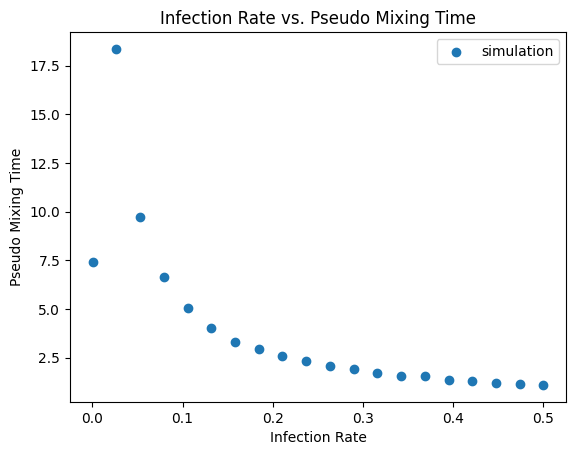

In [81]:
import matplotlib.pyplot as plt

plt.scatter(b_array_bar, p_mixing_times_bar, label = 'simulation')
plt.legend()
plt.title('Infection Rate vs. Pseudo Mixing Time')
plt.ylabel('Pseudo Mixing Time')
plt.xlabel('Infection Rate')
plt.show()
